# Investigating The Movie Database Project

## Contents:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction:

> **TMDb**: The reason for selecting this particular dataset is because of my interest in acting and hence this dataset is related to the film industry. 
> In this project i would try to understand the different factors behind the success of the movies that made more profits, so the question answered would be:
>    *What are the factors behind the success of the movies that earned higher profits?*

In [24]:
# Libraries needed for this project:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


### General Properties:

In [25]:
# First glance of data by loading a few rows only: 

df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

There are 21 columns in total from which some of them need to be dropped as they are not relevent to the output we are expecting, which we will be doing later in the data cleaning process.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There are null values in multiple columns, we can remove these colums(if irrelevent) or remove the rows(if possible) or fill in the rows with another values(mean/mode or so).<br>
Also the release_date column has data type object which we might change to datetime later.<br><br>
All the above steps will be performed later in the Data Cleaning process.

In [27]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

There are multiple duplicate values in some columns as some are necessary to group into while others need to be cleared.<br>
Which also we would be doing in the next process.

In [28]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

There are different sorts of values obtained from above in which some have complete 0 values which need to be corrected below.


### Data Cleaning Process:

Based on what we obtained from above process, we need to analyze and clean data for the following:

1.Drop irrelevent columns<br>
2.Convert release_date column type to datetime<br>
3.Drop rows where values are 0<br>
4.Drop duplicate rows<br>
5.Drop certain rows in which information is incomplete and also cannot be replaced by other values



In [29]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'director', 'tagline', 'overview'], axis=1, inplace=True)

Dropped columns that weren't needed

In [63]:
import datetime

df['release_date'] = pd.to_datetime(df['release_date'], format='%mm/%dd/%yyyy')


def fix_date(x):

    if x.year > 2015:

        year = x.year - 100

    else:

        year = x.year

    return datetime.date(year,x.month,x.day)


df['release_date'] = df['release_date'].apply(fix_date)

df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')

Converted release_date column type object to datetime

In [67]:
df.drop(df[(df.budget_adj == 0)].index, inplace=True)

Dropped rows from budget_adj where values were 0

In [68]:
df.drop_duplicates(inplace=True)

Dropped all the duplicates of rows

In [69]:
df.dropna(inplace=True, subset=['genres', 'production_companies'])

Lastly, dropped some rows where gerene and production_companies were missing

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question: What are the factors behind the success of the movies that earned higher profits?

In [71]:
df['profit'] = df['revenue_adj'] - df['budget_adj']

Created new profit column

In [79]:
dft = df.nlargest(50, ['profit'])

Got our target data consisting of top 50 movies that earned maximum profits

**Let's see how the budget for each of these movies is related to profits earned:**

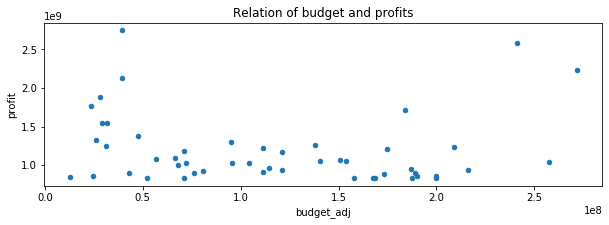

In [128]:
dft.plot.scatter(figsize=(10,3), x='budget_adj', y='profit', title='Relation of budget and profits')

As we can see, there isn't strong correlation between budget and profits, however when outliers are ignored, more low budget movies have earned profits than that of high budget movies comparatively

**Now, let's see how the popularity of each of these movies is related to the profits earned:**

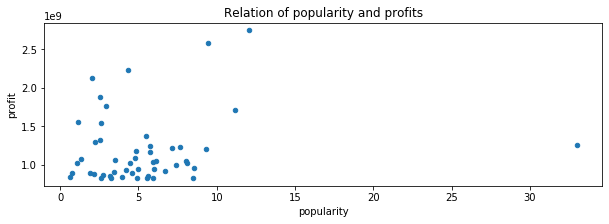

In [127]:
dft.plot.scatter(figsize=(10,3), x='popularity', y='profit', title='Relation of popularity and profits')

Intresting observation to be noted here is that, there is a negative correlation between profits and popularity where movies that have earned higher profits are less popular

**Next, let's see how the voter's ratings are related to profits earned:**

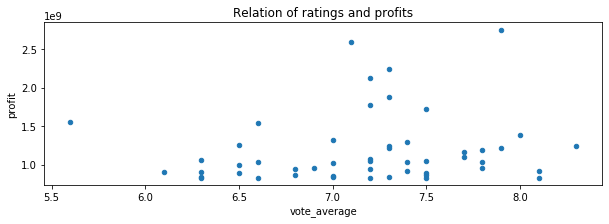

In [126]:
dft.plot.scatter(figsize=(10,3), x='vote_average', y='profit', title='Relation of ratings and profits')

As observed above, majority of the votes tend to be slightly positively correlated

**Next, let's see how the runtime of movies relates to profits earned:**

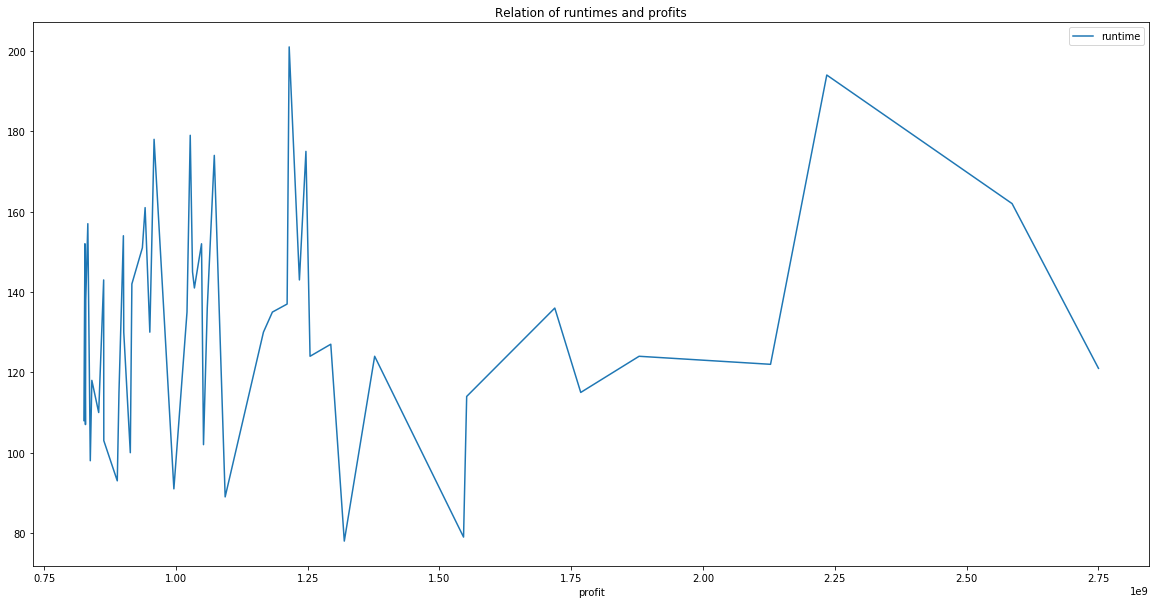

In [123]:
dft.plot(figsize=(20,10), x='profit', y='runtime', title='Relation of runtimes and profits')

As observed above, higher profit earning movies tend to have duration in between 120 to 200, which falls in the range of average to above average runtimes

**Next, let's see how release years of these movies are related to profits:**

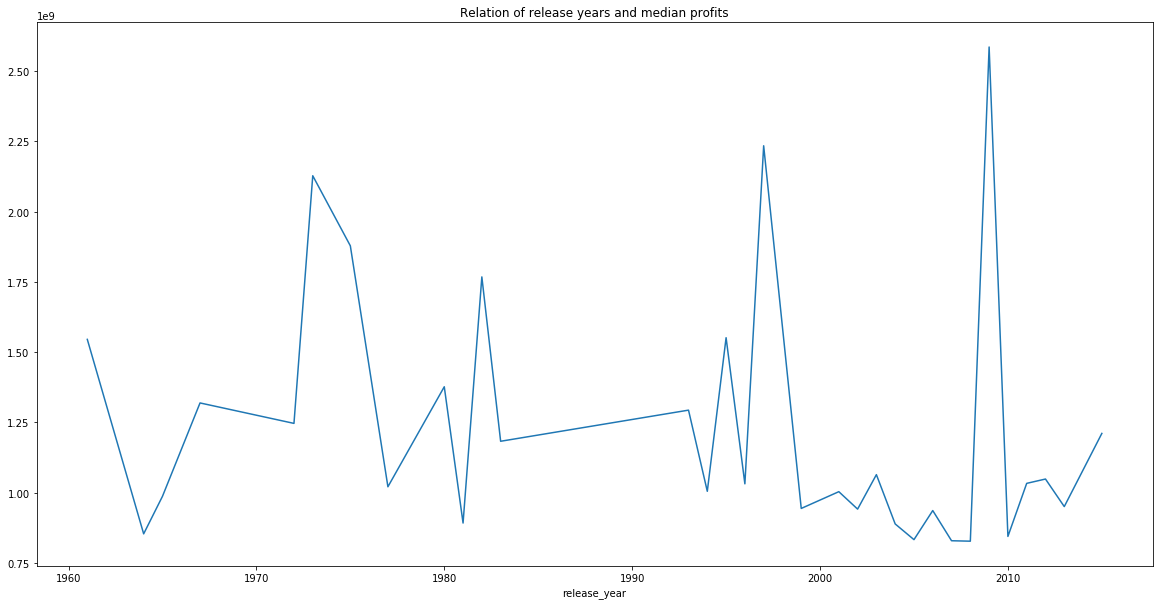

In [122]:
dft.groupby('release_year').median()['profit'].plot(figsize=(20,10), x='release_year', title='Relation of release years and median profits')

As observed above, highest profits earned movies are above 2k year however fascinatingly, only a few movies above 2k year have earned high profits while the mean of profits below 2k year is comparatively much higher

**Next, let's see how the quarters of release of these movies are related to the profits:**

Text(0, 0.5, 'profit')

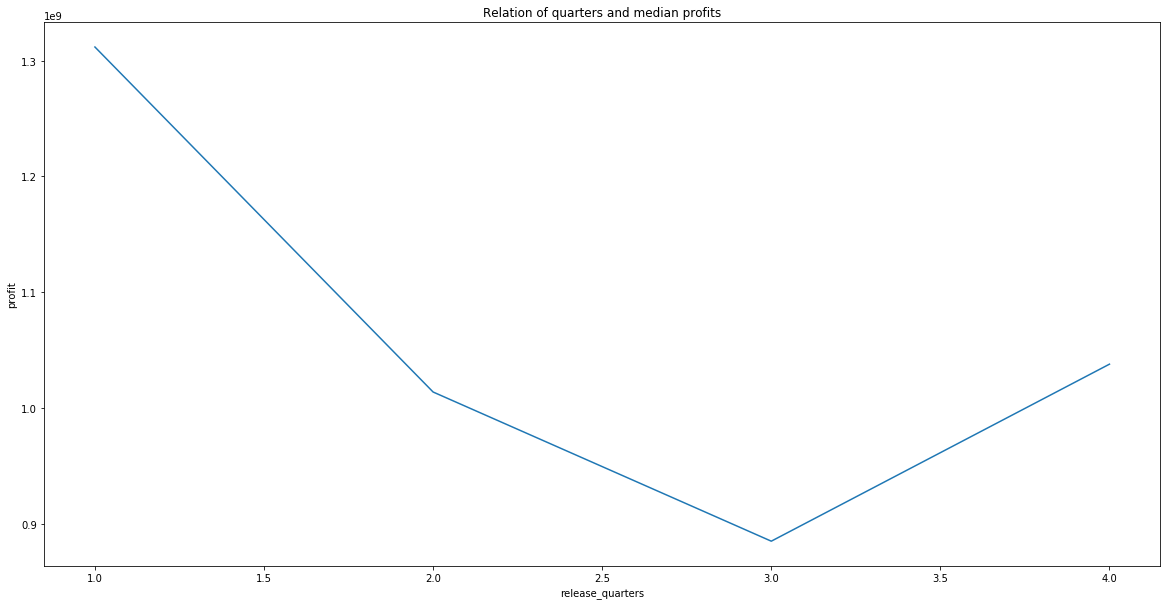

In [129]:
dft.groupby(dft.release_date.dt.quarter).median()['profit'].plot(
    figsize=(20,10),
    title='Relation of quarters and median profits')
plt.xlabel('release_quarters')
plt.ylabel('profit')

As observed above, profits are maximum in the first quarter while gradually decreasing till third quarter and again steep rise in the fourth quarter

<a id='conclusions'></a>
## Conclusions:

**Factors behind the success of the movies that earned higher profits are listed below in most to least effective manner:**<br><br>
1. Duration of the movie must be average which is not too long or short (120-200) in order to earn higher profits.<br>
2. Ratings must be higher (7 and above).<br>
3. Release quarter must preferably be first or fourth.<br>
4. Budget must be as controlled as possible.<br>
5. Release year wont matter at all.<br>
6. Mostly lower the popularity, higher the profits.<br><br>

## Limitations:

1. Runtime column was somewhat not balanced.<br>
2. Popularity records were probably not accurate.<br>
3. Some rows were dropped where values were 0 which if present, probably might've resulted in more profitable movies hence, increasing the accuracy of the result.<br>
4. Voters quantity was not balanced.<br>
5. Outliers present in each result hence, affecting the accuracy of the project